We need to use this notebook to inspect the perfusion data & ensure that we correct for when nonlinear fitting failed. <br> <br> The first step we need to take is plotting nonlinear peak height against nonparametric peak height. <br> <br> We will begin with <b> NEW DATA: </b>

In [20]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [21]:
setwd("July2018")

ERROR: Error in setwd("July2018"): cannot change working directory


In [22]:
list.files()

[1] "ajnr_bnum_tnum.95.csv"                               
 [2] "anat.csv"                                            
 [3] "biopsies_less100more50inROIs_to_check.csv"           
 [4] "biopsies_less50more0inROIs_to_check.csv"             
 [5] "biopsies_less95more50inROIs_to_check.csv"            
 [6] "biopsies_outside_rois_to_check.csv"                  
 [7] "bnum_tnum_forIGTstats_olddata.129.csv"               
 [8] "diffu1000.csv"                                       
 [9] "diffu2000.csv"                                       
[10] "new.call_getigtstats.07062018.csv"                   
[11] "oldData_updatedColnames.csv"                         
[12] "olddata_updatedPerf_updatedColnames.csv"             
[13] "out_callIGTstats_old.csv"                            
[14] "out_callIGTstats_rechgg.csv"                         
[15] "pathology_report_072018.csv"                         
[16] "pathology_report.csv"                                
[17] "perf.csv"                                            
[18] "researchpath_withInVivo_oldP01_updatedPERF.apr21.csv"
[19] "researchPath_withInVivoData.csv"                     
[20] "spec.csv"

In [23]:
perf = read.csv("perf.csv")

In [24]:
colnames(perf)

[1] "bnum"           "tnum"           "vialid"         "ph_nonlin"     
 [5] "phn_nonlin"     "cbv_nonlin"     "cbvn_nonlin"    "recov_nonlin"  
 [9] "recovn_nonlin"  "rf_nonlin"      "rfn_nonlin"     "ttp_nonlin"    
[13] "fwhm_nonlin"    "rsquare_nonlin" "ph_nonpar"      "phn_nonpar"    
[17] "pbs_nonpar"     "pbsn_nonpar"    "recov_nonpar"   "recovn_nonpar" 
[21] "acorr_nonpar"

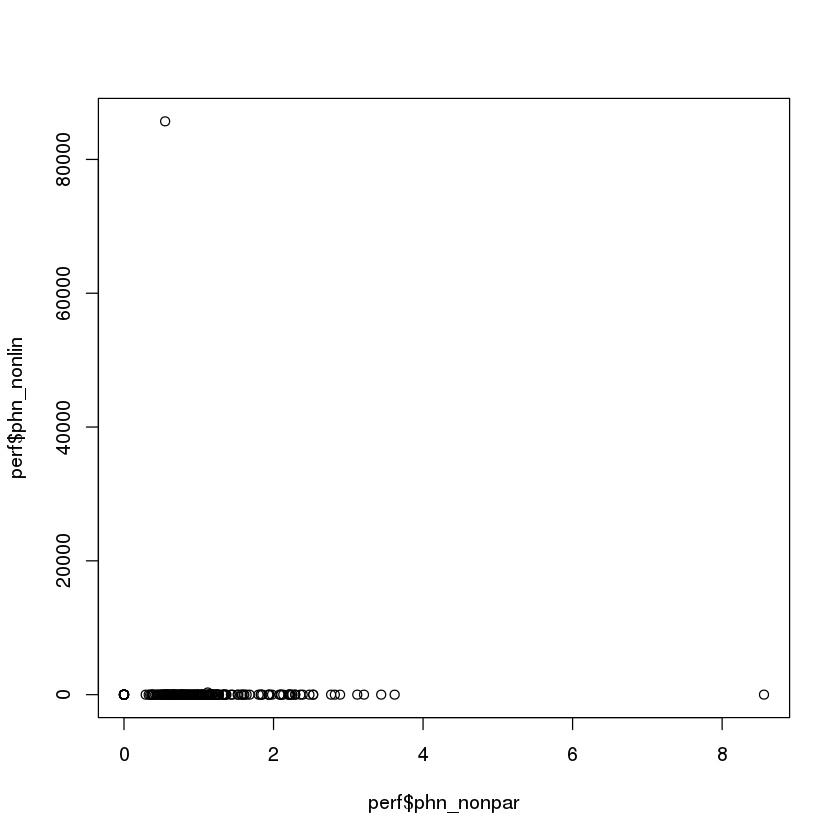

In [25]:
plot(perf$phn_nonpar, perf$phn_nonlin)

From this initial plot it is quite obvious where at least one fit has failed, let's find which & annotate that: 

## Extreme values: 

In [26]:
perf_annot = data.frame(perf, fit_failed = NA )

In [28]:
perf_annot$fit_failed[which(perf_annot$phn_nonlin>20)]=1
perf_annot$cbvn_nonlin[which(perf_annot$phn_nonlin>20)]=NA
perf_annot$phn_nonlin[which(perf_annot$phn_nonlin>20)]=NA

perf_annot[which(perf_annot$fit_failed ==1),]


,bnum,tnum,vialid,ph_nonlin,phn_nonlin,cbv_nonlin,cbvn_nonlin,recov_nonlin,recovn_nonlin,rf_nonlin,rfn_nonlin,ttp_nonlin,fwhm_nonlin,rsquare_nonlin,ph_nonpar,phn_nonpar,pbs_nonpar,pbsn_nonpar,recov_nonpar,recovn_nonpar,acorr_nonpar,fit_failed
127,b4266,t11295,48B97,76788.98,NA,23145.38,NA,100,-100.43,0,0,43.57,0.28,-42.35,398.34,1.12,0,0,100,100,0.03,1
128,b4266,t11295,49B97,6063.48,NA,23431.72,NA,100,-100.43,0,0,47.11,3.56,-233.72,310.51,0.88,0,0,100,100,0.06,1
132,b4273,t11333,56B97,3001100.34,NA,23504.97,NA,100,-135.44,0,0,2.70,0.01,-69.44,155.87,0.55,0,0,100,100,0.09,1


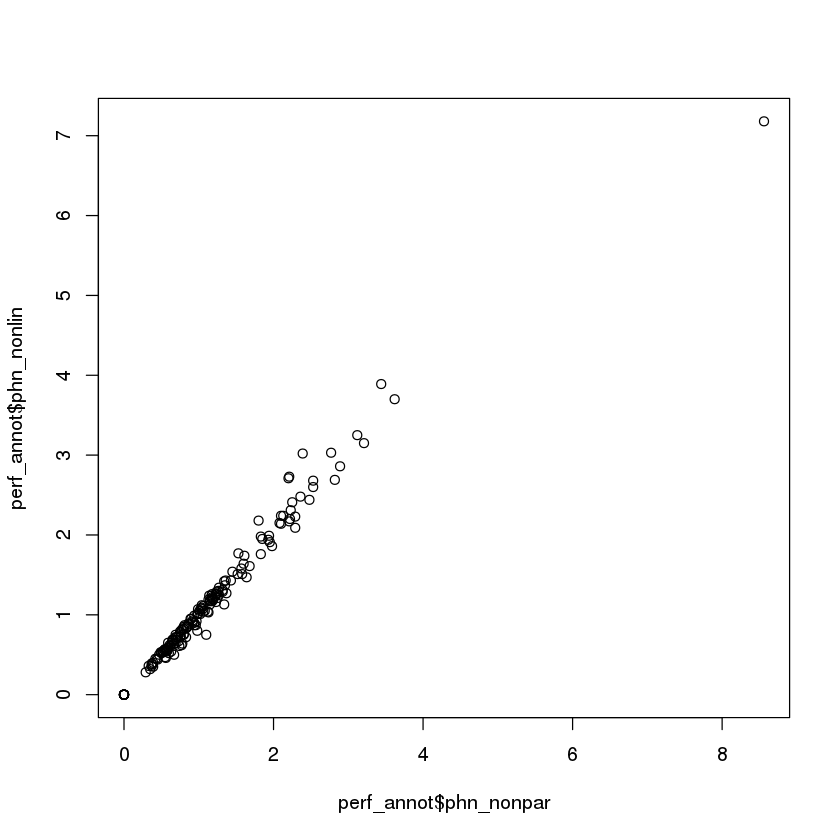

In [14]:
plot(perf_annot$phn_nonpar, perf_annot$phn_nonlin)


In [15]:
perf[which(perf$phn_nonlin > 200),]

,bnum,tnum,vialid,ph_nonlin,phn_nonlin,cbv_nonlin,cbvn_nonlin,recov_nonlin,recovn_nonlin,rf_nonlin,rfn_nonlin,ttp_nonlin,fwhm_nonlin,rsquare_nonlin,ph_nonpar,phn_nonpar,pbs_nonpar,pbsn_nonpar,recov_nonpar,recovn_nonpar,acorr_nonpar
127,b4266,t11295,48B97,76788.98,325.90,23145.38,2.29,100,-100.43,0,0,43.57,0.28,-42.35,398.34,1.12,0,0,100,100,0.03
132,b4273,t11333,56B97,3001100.34,85693.93,23504.97,23.82,100,-135.44,0,0,2.70,0.01,-69.44,155.87,0.55,0,0,100,100,0.09


Going to redo the quant for: 
1. t11295 48B97
2. t11333 56B97

In [11]:
## So I went to t11295 & ran: 
# make_perf.dev -f -b nonlinear t11295 --align r 
# perf_biopsy_all.x 

## Nothing changed; still strange fitting. Will just have to accept for now &
## annotate as failing fit. 

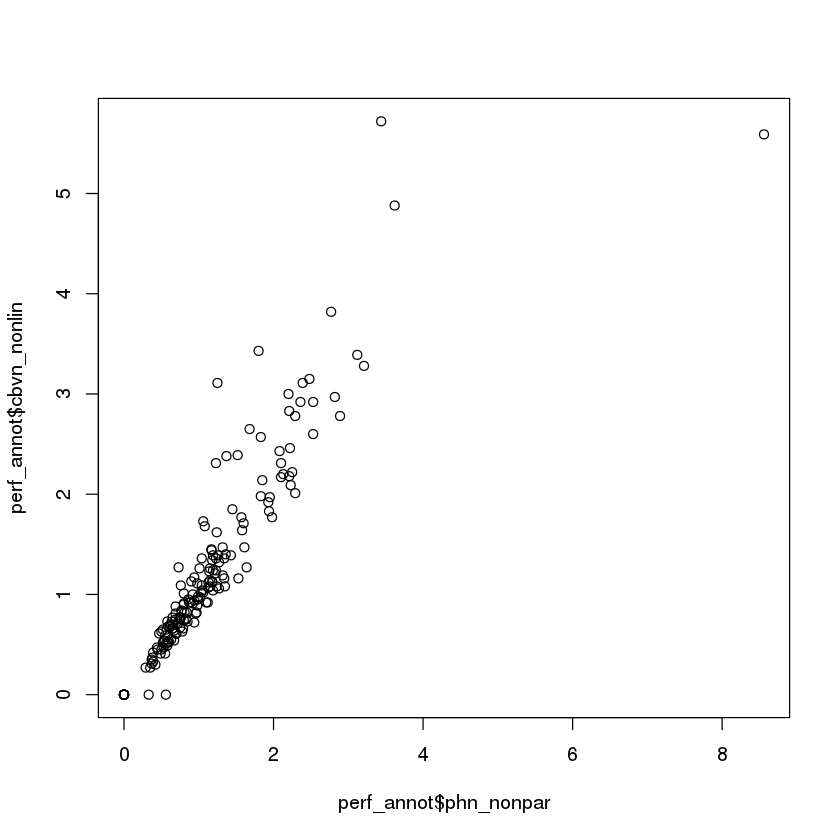

In [29]:
plot(perf_annot$phn_nonpar, perf_annot$cbvn_nonlin)
## This looks good, now must move onto zero analysis.

## Values of zero: 

In [13]:
which(perf_annot$phn_nonpar==0)
which(perf_annot$phn_nonlin==0)
perf_annot[which(perf_annot$phn_nonlin==0),]


[1]  12  16  35  65  66  69  80 103 125 143 161 167 169

[1]  12  16  35  65  66  69  80 103 125 143 161 167 169

,bnum,tnum,vialid,ph_nonlin,phn_nonlin,cbv_nonlin,cbvn_nonlin,recov_nonlin,recovn_nonlin,rf_nonlin,rfn_nonlin,ttp_nonlin,fwhm_nonlin,rsquare_nonlin,ph_nonpar,phn_nonpar,pbs_nonpar,pbsn_nonpar,recov_nonpar,recovn_nonpar,acorr_nonpar,fit_failed
12,b3526,t8943,67B63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
16,b1837,t8960,88B63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
35,b3577,t9063,82B64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
65,b3704,t9410,41B76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
66,b3739,t9586,10B77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
69,b3739,t9586,13B77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
80,b4080,t10366,4B82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
103,b4205,t10756,69B91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
125,b4260,t11263,44B97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA
143,b4295,t11406,34D3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA


1. t11406 - these curves were totally messed up so I am re-running make_perf.dev, hoping that might change something for the better. 
2. t11579 - re-running make_perf.dev, perhaps will quantify cbv 
3. t11753 - necrosis needs to be drawn, I believe it's right in the necrotic region... at least for A1; biopsy doesn't open in sivic for some reason. Seems to have worked, run perf_biopsy_all.x
4. t11263 - seems like low perfusion throughout, wouldn't be surprised if it had zero perf params 
5. t9586 - seems like low perfusion throughout, wouldn't be surprised if it had zero perf params, but re-running everythign anyway 
6. t9063 - 
7. t8943 - 
8. t8960 - 
9. t9410 - 
10. t10366 - 
11. t10756 - 


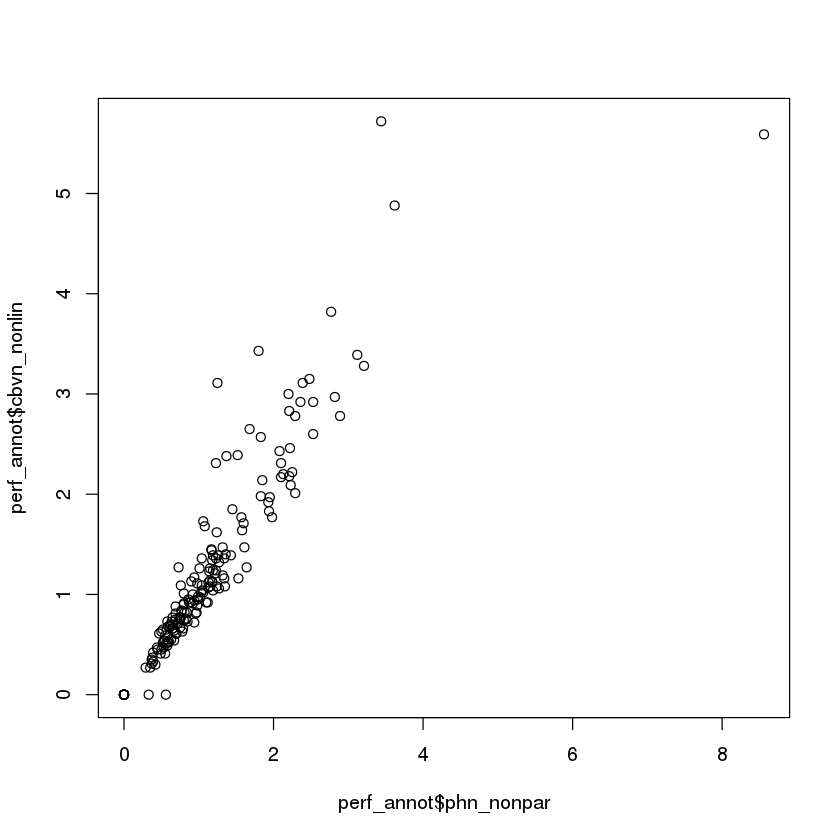

In [15]:
plot(perf_annot$phn_nonpar, perf_annot$cbvn_nonlin)

In [17]:
perf_annot[which(perf_annot$phn_nonpar !=0  & perf_annot$cbvn_nonlin ==0),]

,bnum,tnum,vialid,ph_nonlin,phn_nonlin,cbv_nonlin,cbvn_nonlin,recov_nonlin,recovn_nonlin,rf_nonlin,rfn_nonlin,ttp_nonlin,fwhm_nonlin,rsquare_nonlin,ph_nonpar,phn_nonpar,pbs_nonpar,pbsn_nonpar,recov_nonpar,recovn_nonpar,acorr_nonpar,fit_failed
46,b3605,t9127,14B71,66.72,0.36,0.42,0,100,114.04,0,0,0.00,0.00,-0.90,64.00,0.33,0,0,100,100,0.18,NA
131,b4273,t11333,55B97,16.00,0.46,3.17,0,100,-135.44,0,0,2.93,0.16,-4.18,159.04,0.56,0,0,100,100,0.05,NA


In [17]:
perf_annot$fit_failed[which(perf_annot$phn_nonpar ==0 & perf_annot$cbvn_nonlin ==0 & perf_annot$phn_nonlin ==0)]=2 

In [32]:
perf_annot[which(perf_annot$phn_nonlin==0),]$fit_failed = 2

In [37]:
fit_failed = perf_annot[which(perf_annot$fit_failed > 0),]

In [38]:
write.csv(fit_failed, "new_data_fit_failed_to_janine.csv", row.names = F)

I just realized that I can use batch_perf_biopsy.x to write out reasons why these things might fail, let's use the bnum tnum of fit_failed to run batch_perf_biopsy.x

In [50]:
list.files()

[1] "ajnr_bnum_tnum.95.csv"                                 
 [2] "anat.csv"                                              
 [3] "biopsies_less100more50inROIs_to_check.csv"             
 [4] "biopsies_less50more0inROIs_to_check.csv"               
 [5] "biopsies_less95more50inROIs_to_check.csv"              
 [6] "biopsies_outside_rois_to_check.csv"                    
 [7] "bnum_tnum_forIGTstats_olddata.129.csv"                 
 [8] "bnum_tnum_newdata_fit_failed_for_batch_perf_biopsy.csv"
 [9] "diffu1000.csv"                                         
[10] "diffu2000.csv"                                         
[11] "new_data_fit_failed_to_janine.csv"                     
[12] "new.call_getigtstats.07062018.csv"                     
[13] "oldData_updatedColnames.csv"                           
[14] "olddata_updatedPerf_updatedColnames.csv"               
[15] "out_callIGTstats_old.csv"                              
[16] "out_callIGTstats_rechgg.csv"                           
[17] "pathology_report_072018.csv"                           
[18] "pathology_report.csv"                                  
[19] "perf.csv"                                              
[20] "researchpath_withInVivo_oldP01_updatedPERF.apr21.csv"  
[21] "researchPath_withInVivoData.csv"                       
[22] "spec.csv"

In [ ]:
## batch_perf_biopsy.x bnum_tnum_newdata_fit_failed_for_batch_perf_biopsy.16.csv out_batch_perf_biopsy.16.csv

# Old data: where did perfusion fail? 

In [41]:
list.files()

[1] "ajnr_bnum_tnum.95.csv"                               
 [2] "anat.csv"                                            
 [3] "biopsies_less100more50inROIs_to_check.csv"           
 [4] "biopsies_less50more0inROIs_to_check.csv"             
 [5] "biopsies_less95more50inROIs_to_check.csv"            
 [6] "biopsies_outside_rois_to_check.csv"                  
 [7] "bnum_tnum_forIGTstats_olddata.129.csv"               
 [8] "diffu1000.csv"                                       
 [9] "diffu2000.csv"                                       
[10] "new_data_fit_failed_to_janine.csv"                   
[11] "new.call_getigtstats.07062018.csv"                   
[12] "oldData_updatedColnames.csv"                         
[13] "olddata_updatedPerf_updatedColnames.csv"             
[14] "out_callIGTstats_old.csv"                            
[15] "out_callIGTstats_rechgg.csv"                         
[16] "pathology_report_072018.csv"                         
[17] "pathology_report.csv"                                
[18] "perf.csv"                                            
[19] "researchpath_withInVivo_oldP01_updatedPERF.apr21.csv"
[20] "researchPath_withInVivoData.csv"                     
[21] "spec.csv"

In [44]:
old.data = read.csv("researchpath_withInVivo_oldP01_updatedPERF.apr21.csv")

In [46]:
head(old.data)

X,vial_id,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,tumor_cell_evaluation,necrosis,f8_delicate,f8_simple,f8_complex,mib_1,bx_pure_treatment_effect,nfse,nfl,nt1v,nt1c,nadc,nfa,nev1,nev2,nev3,nevrad,nadc.1,nfa.1,nev1.1,nev2.1,nev3.1,nevrad.1,phn_nlin,cbvn_nlin,recovn_nlin,rfn_nlin,phn_npar,recovn_npar,cni,ccri,crni,ncho,ncre,nnaa,nlip,nlac,nxsch,nxscc,nxscr
17,10B28,2723,6369,8122,9/13/09,9/14/09,Grade IV,Glioblastoma,0,0,2,1,0,0.82,t,2.10,1.84,0.84,1.20,1.31,0.75,1.19,1.28,1.58,1.45,NA,NA,NA,NA,NA,NA,0.81,0.66,103.17,1.055,0.79,100.00,4.98,3.28,0.24,1.65,0.53,0.41,-0.01,0.28,1.34,1.28,0.06
18,11B16,2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,2,1,2,3,0,3.31,f,2.27,1.44,0.78,1.88,1.92,0.68,1.63,1.93,2.34,2.14,1.91,1.03,1.91,1.87,1.88,1.92,2.25,2.24,97.69,1.158,2.25,98.51,1.56,0.30,0.75,0.86,0.84,0.46,0.61,0.47,0.51,0.16,0.41
19,11B35,2901,8089,8403,6/25/10,6/30/10,Grade IV,Glioblastoma,3,2,1,0,0,NA,f,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,biopsymask-nonexist,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
20,11B40,2474,7408,8701,3/23/11,3/24/11,Grade IV,Glioblastoma,,,,,,NA,,1.84,1.13,0.79,0.82,1.71,0.50,1.35,1.79,2.47,2.12,1.71,0.68,1.43,1.72,2.02,1.96,1.28,1.23,112.64,0.000,1.21,100.00,2.48,0.22,1.66,0.88,0.81,0.37,0.24,0.32,0.53,0.19,0.39
21,11B43,3169,7540,8796,6/19/11,6/20/11,Grade IV,Glioblastoma,2,0,3,0,0,17.00,f,2.35,1.97,0.78,0.76,1.34,0.68,1.13,1.34,1.63,1.50,NA,NA,NA,NA,NA,NA,0.67,0.58,133.94,0.000,0.60,100.00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22,12B16,2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,2,1,3,2,0,12.84,f,2.20,1.56,0.74,2.04,2.04,0.89,1.83,2.12,2.22,2.23,1.75,0.69,1.54,1.72,2.16,1.96,1.73,1.71,97.87,1.157,1.88,99.20,2.46,1.30,0.55,1.19,0.87,0.59,0.34,0.49,0.75,0.46,0.35


In [45]:
data.frame(index = 1:length(colnames(old.data)), colnames = colnames(old.data))


index,colnames
1,X
2,vial_id
3,b_number
4,t_number
5,sf_number
6,current_scan_date
7,current_surgery_date
8,current_hist_grade
9,current_hist_type
10,tumor_cell_evaluation


In [47]:
perf.olddata = old.data[,c(2:4, 33:38)]

In [48]:
head(perf.olddata)

vial_id,b_number,t_number,phn_nlin,cbvn_nlin,recovn_nlin,rfn_nlin,phn_npar,recovn_npar
10B28,2723,6369,0.81,0.66,103.17,1.055,0.79,100.00
11B16,2312,5317,2.25,2.24,97.69,1.158,2.25,98.51
11B35,2901,8089,biopsymask-nonexist,NA,NA,NA,NA,NA
11B40,2474,7408,1.28,1.23,112.64,0.000,1.21,100.00
11B43,3169,7540,0.67,0.58,133.94,0.000,0.60,100.00
12B16,2312,5317,1.73,1.71,97.87,1.157,1.88,99.20


In [49]:
table(perf.olddata$phn_nlin)


                            0                          0.08 
                           32                             1 
                         0.19                          0.22 
                            1                             1 
                         0.24                          0.25 
                            2                             1 
                         0.27                          0.31 
                            2                             1 
                         0.32                          0.33 
                            1                             1 
                         0.38                          0.39 
                            1                             1 
                         0.42                          0.43 
                            1                             1 
                         0.44                          0.45 
                            1                             1 
                       